In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import kagglehub
import pandas as pd
import os


In [2]:
# Download the dataset from Kaggle using kagglehub
# This will return the local path where the dataset is stored
path = kagglehub.dataset_download("dgomonov/new-york-city-airbnb-open-data")
print("Dataset downloaded to:", path)
print(os.listdir(path))
df = pd.read_csv(os.path.join(path, "AB_NYC_2019.csv"))

df.head()


Using Colab cache for faster access to the 'new-york-city-airbnb-open-data' dataset.
Dataset downloaded to: /kaggle/input/new-york-city-airbnb-open-data
['AB_NYC_2019.csv', 'New_York_City_.png']


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [16]:
df = df.dropna(subset=["reviews_per_month"])

In [17]:
df.loc[:, "last_review"] = df["last_review"].fillna("unknown")

In [5]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [47]:
num_cols = df.select_dtypes(include=["number"]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
category_cols = df.select_dtypes(include=["category"]).columns
df[category_cols] = df[category_cols].fillna(df[category_cols].mode())
Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df["price"] >= lower_bound) & (df["price"] <= upper_bound)]

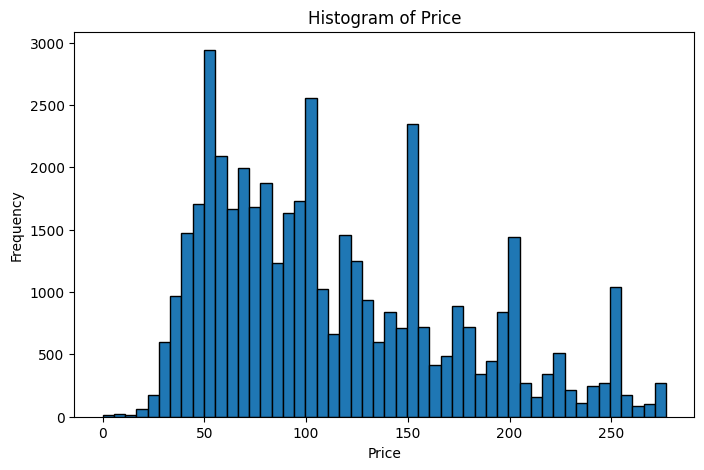

In [48]:
# Histogram of price
plt.figure(figsize=(8,5))
plt.hist(df["price"], bins=50, edgecolor="black")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Histogram of Price")
plt.show()

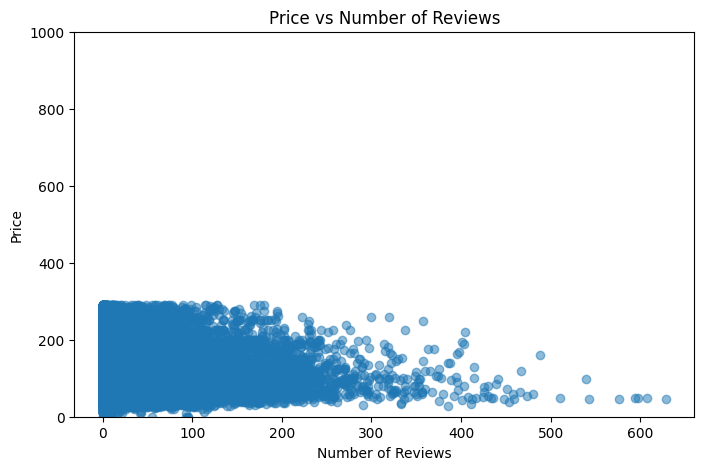

In [42]:
# Create a scatter plot of number_of_reviews (x-axis) vs price (y-axis)
plt.figure(figsize=(8,5))
plt.scatter(df["number_of_reviews"], df["price"], alpha=0.5)
plt.xlabel("Number of Reviews")
plt.ylabel("Price")
plt.title("Price vs Number of Reviews")
plt.ylim(0, 1000)
plt.show()

<Figure size 800x500 with 0 Axes>

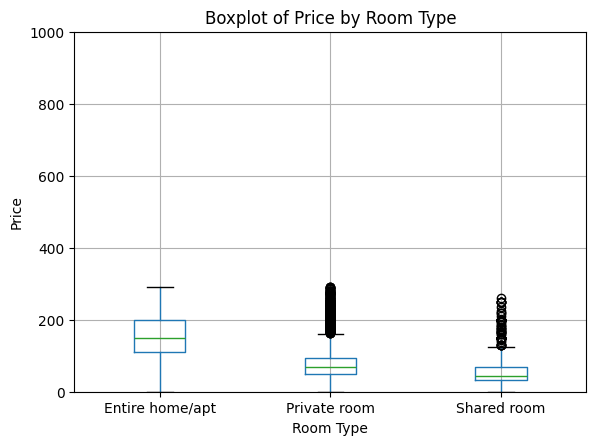

In [43]:
# Create a boxplot of price grouped by room_type
# This shows the distribution (median, quartiles, outliers) of price for each room type
plt.figure(figsize=(8,5))
df.boxplot(column="price", by="room_type")
plt.xlabel("Room Type")
plt.ylabel("Price")
plt.title("Boxplot of Price by Room Type")
plt.suptitle("")
plt.ylim(0, 1000)
plt.show()

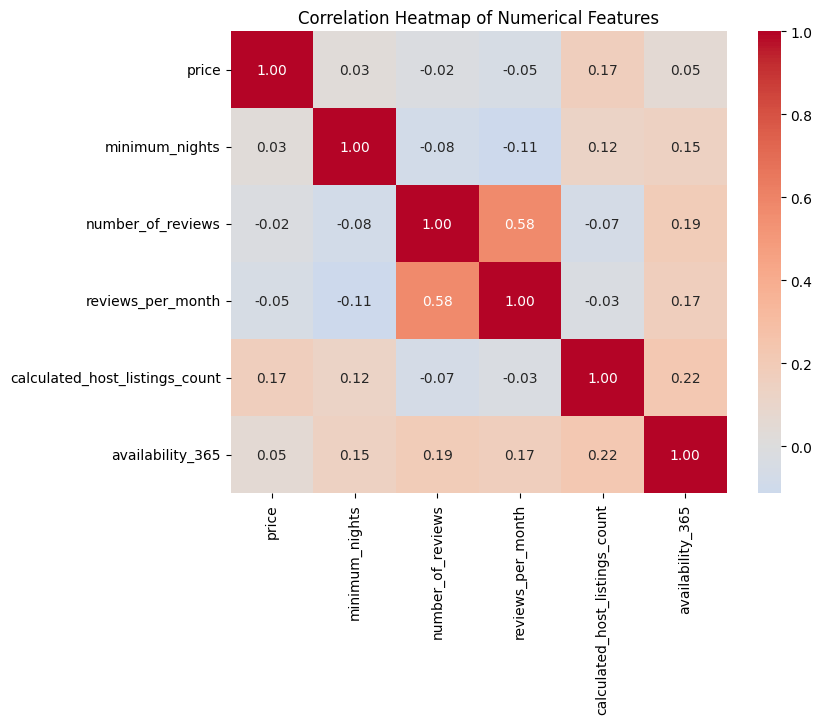

In [44]:
cols = ["price", "minimum_nights", "number_of_reviews",
        "reviews_per_month", "calculated_host_listings_count",
        "availability_365"]

corr = df[cols].corr()  # correlation matrix

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [28]:
cat_cols = ["neighbourhood_group", "room_type"]

# OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, drop="first")  # drop="first" to avoid dummy variable trap
encoded = ohe.fit_transform(df[cat_cols])

# Convert back to DataFrame
encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(cat_cols), index=df.index)

# Concatenate back with original df
df_encoded = pd.concat([df.drop(columns=cat_cols), encoded_df], axis=1)

In [29]:
df_encoded["price_per_accommodates"] = df_encoded["price"] / df_encoded["minimum_nights"].replace(0, 1)

In [30]:
# Numerical features to scale
num_cols = ["minimum_nights", "number_of_reviews", "reviews_per_month",
            "calculated_host_listings_count", "availability_365", "price_per_accommodates"]

scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

In [33]:
features = ["neighbourhood_group", "room_type", "minimum_nights",
            "number_of_reviews", "reviews_per_month",
            "calculated_host_listings_count", "availability_365"]
target = "price"

X = df[features]
y = df[target]

# Train/test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Categorical and numeric columns
cat_cols = ["neighbourhood_group", "room_type"]
num_cols = ["minimum_nights", "number_of_reviews", "reviews_per_month",
            "calculated_host_listings_count", "availability_365"]

# Preprocessing: OneHotEncoder for categorical
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", sparse_output=False), cat_cols),
        ("num", "passthrough", num_cols)
    ]
)

# Pipeline: preprocessing + regression
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# Fit
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

MSE: 2530.419723054885
RMSE: 50.303277458381224
R²: 0.4567889484551485


In [36]:
param_grid_ridge = {"regressor__alpha": [0.01, 0.1, 1, 10, 100]}
param_grid_lasso = {"regressor__alpha": [0.01, 0.1, 1, 10, 100]}
param_grid_elastic = {
    "regressor__alpha": [0.01, 0.1, 1, 10, 100],
    "regressor__l1_ratio": [0.1, 0.5, 0.9]
}

# Pipelines
ridge_pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", Ridge())
])
lasso_pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", Lasso(max_iter=10000))
])
elastic_pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", ElasticNet(max_iter=10000))
])

# GridSearchCV
ridge_cv = GridSearchCV(ridge_pipe, param_grid_ridge, cv=5, scoring="neg_mean_squared_error")
lasso_cv = GridSearchCV(lasso_pipe, param_grid_lasso, cv=5, scoring="neg_mean_squared_error")
elastic_cv = GridSearchCV(elastic_pipe, param_grid_elastic, cv=5, scoring="neg_mean_squared_error")

# Fit models
ridge_cv.fit(X_train, y_train)
lasso_cv.fit(X_train, y_train)
elastic_cv.fit(X_train, y_train)

# Best estimators
best_ridge = ridge_cv.best_estimator_
best_lasso = lasso_cv.best_estimator_
best_elastic = elastic_cv.best_estimator_

# Predictions
y_pred_ridge = best_ridge.predict(X_test)
y_pred_lasso = best_lasso.predict(X_test)
y_pred_elastic = best_elastic.predict(X_test)

# Evaluation function
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {"MSE": mse, "RMSE": rmse, "R2": r2}

# Results
results = {
    "Ridge": evaluate_model(y_test, y_pred_ridge),
    "Lasso": evaluate_model(y_test, y_pred_lasso),
    "ElasticNet": evaluate_model(y_test, y_pred_elastic),
}

print("Best Ridge alpha:", ridge_cv.best_params_)
print("Best Lasso alpha:", lasso_cv.best_params_)
print("Best ElasticNet params:", elastic_cv.best_params_)
print("\nPerformance Results:")
print(results)

Best Ridge alpha: {'regressor__alpha': 1}
Best Lasso alpha: {'regressor__alpha': 0.01}
Best ElasticNet params: {'regressor__alpha': 0.01, 'regressor__l1_ratio': 0.9}

Performance Results:
{'Ridge': {'MSE': 2530.435787921903, 'RMSE': np.float64(50.30343713825033), 'R2': 0.45678549977300853}, 'Lasso': {'MSE': 2530.7068134029873, 'RMSE': np.float64(50.30613097230781), 'R2': 0.45672731810645173}, 'ElasticNet': {'MSE': 2531.9367023198365, 'RMSE': np.float64(50.3183535334756), 'R2': 0.4564632950095251}}


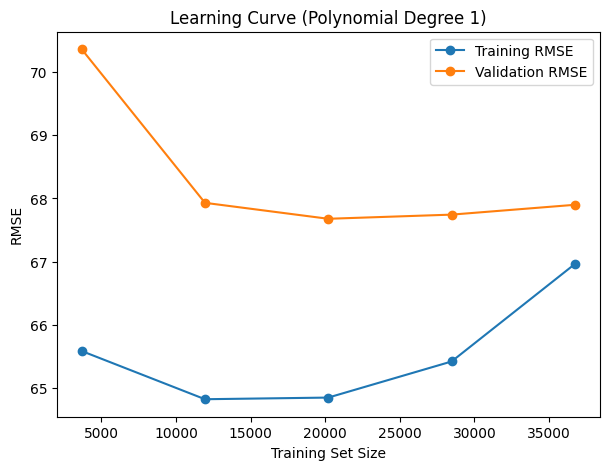

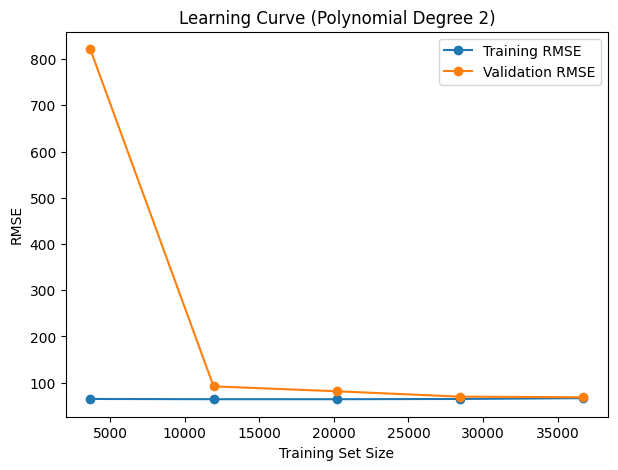

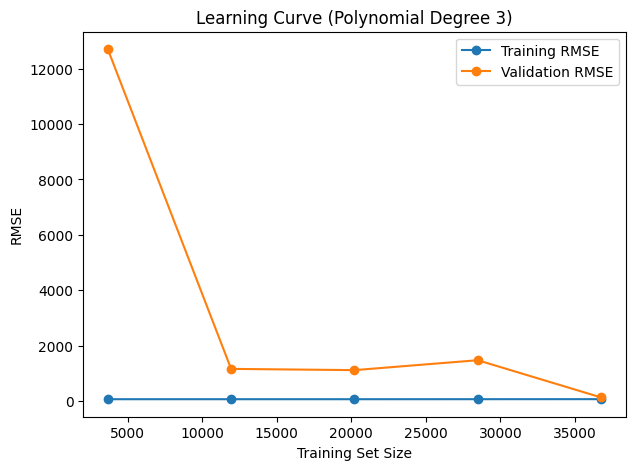

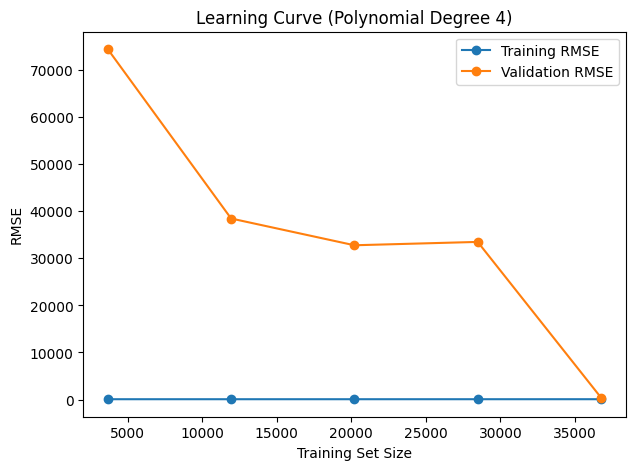

In [39]:
degrees = [1, 2, 3, 4]
train_sizes = np.linspace(0.1, 1.0, 5)

# Use only numerical predictors for polynomial features
num_X = df[num_cols]
y = df["price"]

for d in degrees:
    poly = PolynomialFeatures(degree=d, include_bias=False)
    X_poly = poly.fit_transform(num_X)

    model = LinearRegression()

    # Learning curve
    train_sizes, train_scores, val_scores = learning_curve(
        model, X_poly, y, cv=5, scoring="neg_mean_squared_error",
        train_sizes=train_sizes, n_jobs=-1
    )

    # Convert to RMSE
    train_rmse = np.sqrt(-train_scores.mean(axis=1))
    val_rmse = np.sqrt(-val_scores.mean(axis=1))

    # Plot
    plt.figure(figsize=(7,5))
    plt.plot(train_sizes, train_rmse, "o-", label="Training RMSE")
    plt.plot(train_sizes, val_rmse, "o-", label="Validation RMSE")
    plt.title(f"Learning Curve (Polynomial Degree {d})")
    plt.xlabel("Training Set Size")
    plt.ylabel("RMSE")
    plt.legend()
    plt.show()